# fifa analysis: clean data
---

## notebook goals
1. clean data to support analysis in other notebooks

## framing
* client: the management of a team
* client's desire: to build the best team and make the most money
   
## data
* Player personal attributes (Nationality, Club, Photo, Age, Value etc.)
* Player performance attributes (Overall, Potential, Aggression, Agility etc.)
* Player preferred position and ratings at all positions.

---
# steps
* ~~clean data so that null values do not interfere~~
* remove duplicates
* convert strings through numerical values when appropriate,such as wage
* look at correlations to make sure the data distribution is realistic

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
players = pd.read_csv("CompleteDataset.csv",index_col='Unnamed: 0')
players.shape

/Users/nico/code/pydata-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17981, 74)

In [20]:
#we need to rename the index otherwise when this data frame gets written to a file,it uses the old index name
players.index.name = 'index'

## remove duplicates

In [21]:
# are any players who appear twice actually in 2 different clubs?
# apparently not
clubs = players.groupby('Photo')['Club'].nunique()  > 1
clubs[clubs  == True]

Series([], Name: Club, dtype: bool)

In [22]:
#because of the above check, it's safe to remove duplicates
players.drop_duplicates(subset='Photo',inplace=True)
players.shape

(17929, 74)

## convert strings to floats

In [23]:
#convert the monies in Value and Wage columns to numbers
def convertMoney(money):
    money = money[1:]
    try:
        number = float(money[:-1])
    except:
        number = 0
    if money[-1] == 'M':
        return number * 1000000
    if money[-1] == 'K':
        return number * 1000
    else:
        return number
    
players['Value'] = players['Value'].apply(convertMoney)

players['Wage'] = players['Wage'].apply(convertMoney)

In [24]:
players.describe()

,Age,Overall,Potential,Value,Wage,Special,CAM,CB,CDM,CF,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17929.000000,17929.000000,17929.000000,1.792900e+04,17929.000000,17929.000000,15905.000000,15905.000000,15905.000000,15905.000000,...,15905.000000,15905.000000,15905.000000,15905.000000,15905.000000,15905.000000,15905.000000,15905.000000,15905.000000,15905.000000
mean,25.145407,66.213899,71.160912,2.357588e+06,11486.195549,1593.254058,59.212826,55.529456,56.836718,58.991638,...,56.953097,55.529456,58.469538,56.836718,58.991638,60.020622,58.168941,59.321660,57.669789,58.168941
std,4.618983,6.969329,6.083949,5.335751e+06,23057.906406,271.833031,9.861741,12.185218,10.300524,9.908992,...,9.782626,12.185218,8.870525,10.300524,9.908992,9.331225,9.166438,9.960562,9.132719,9.166438
min,16.000000,46.000000,46.000000,0.000000e+00,0.000000,728.000000,27.000000,25.000000,26.000000,27.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,3.000000e+05,2000.000000,1448.000000,53.000000,45.000000,49.000000,53.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,6.750000e+05,4000.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,2.000000e+06,12000.000000,1785.000000,66.000000,65.000000,65.000000,66.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,47.000000,94.000000,94.000000,1.230000e+08,565000.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


## notes from describe
* **age:** the middle 50% of players are between 21 and 28 years old. players play for a long time. does this experience make them better performers?
* **overall:** 
    * the average players Overall score is 66, with a standard deviation of 7. This does not seem to be a big spread.
    * the middle 50% of players overall score is between 62 and 71. This is a smaller spread.
    * Overall,just like the other score columns,looks like it's on a scale of 0 to 100. I don't think these are centered on any particular value intentionally. what tests of statistical significance would help explain the difference between a score of 66 and 67? **ask Paul**
* **potential:** I wonder what the Potential column is based on? 
* **value:** There is a very high standard deviation for Value. When this is graphed, it is exponential. I wonder if I need to put this through a log function when doing my analyses? **ask Paul**
* same question with wage
* **special:** I don't know what Special means. the source of the data does not explain. not worth taking time to inquire.
* **value and wage:** based on my research, the Value and Wage columns are weekly.

In [25]:
#do the datatypes of each column makes sense? they do not.all of these stats should be integers, but they are objects.
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17929 entries, 0 to 17980
Data columns (total 74 columns):
Name                   17929 non-null object
Age                    17929 non-null int64
Photo                  17929 non-null object
Nationality            17929 non-null object
Flag                   17929 non-null object
Overall                17929 non-null int64
Potential              17929 non-null int64
Club                   17681 non-null object
Club Logo              17929 non-null object
Value                  17929 non-null float64
Wage                   17929 non-null float64
Special                17929 non-null int64
Acceleration           17929 non-null object
Aggression             17929 non-null object
Agility                17929 non-null object
Balance                17929 non-null object
Ball control           17929 non-null object
Composure              17929 non-null object
Crossing               17929 non-null object
Curve                  17929 non-null 

In [26]:
players.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [27]:
primary = players[['Overall','Potential','Value','Wage','Age']]

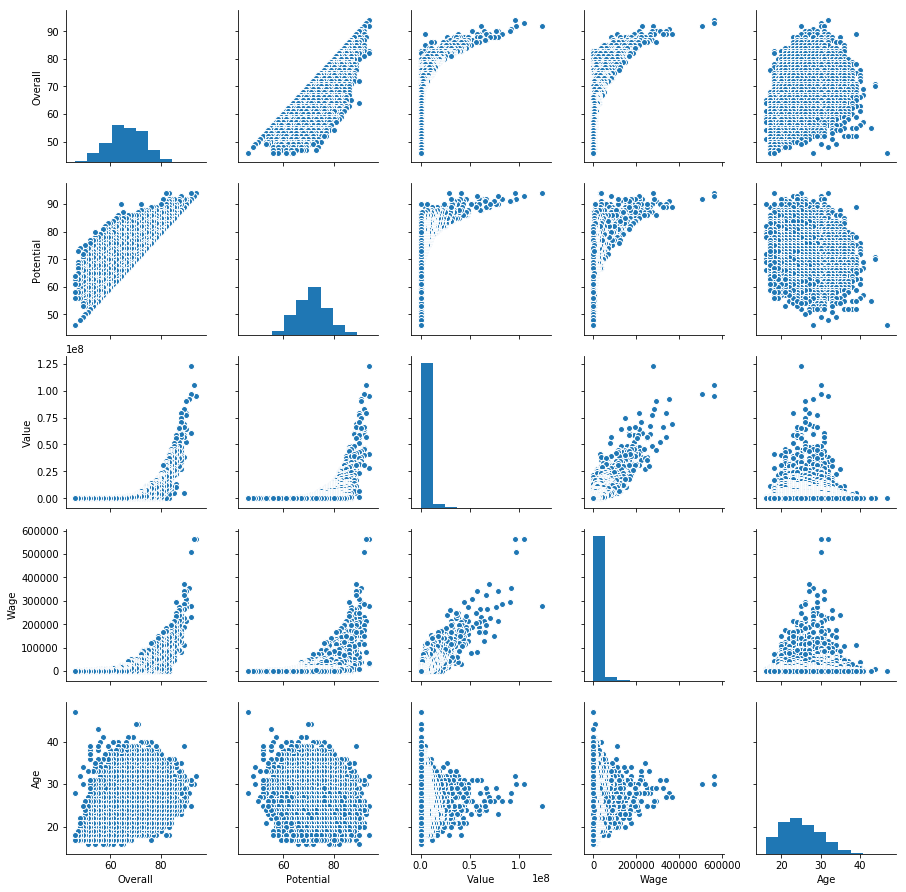

In [28]:
sns.pairplot(primary)

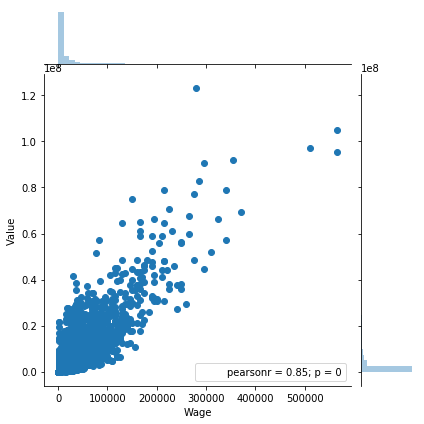

In [29]:
#what is the relation between wage and value? 
#strong correlation
sns.jointplot(x='Wage',y='Value',data=players)

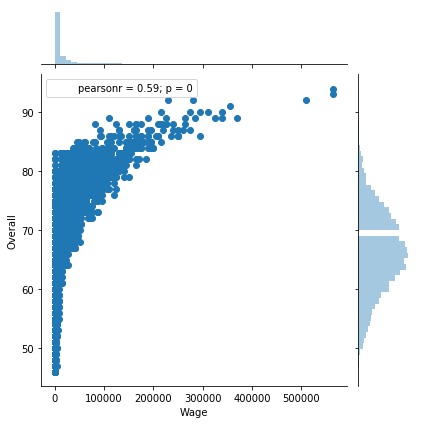

In [30]:
#how strong is the correlation between wage and overall skill?
#there is a correlation of 0.59 - I wonder how this compares to other industries?t
sns.jointplot(x='Wage',y='Overall',data=players)

In [31]:
#write to external file
players.to_csv('CompleteDataset_cleaned.csv')